# FLights Data set 

## Preliminary Wrangling

The original dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

I will analyse the data from 2008 data set. The data set can be downloaded from http://stat-computing.org/dataexpo/2009/the-data.html.

In [165]:
# import modules
import pandas as pd
import numpy as np
import calendar
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering

In [166]:
df= pd.read_csv('data/2008.csv', nrows=None, encoding='latin-1')
df.shape

(7009728, 29)

In [167]:
df.sample()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3934310,2008,7,14,1,1422.0,1410,1554.0,1539,EV,4161,...,12.0,19.0,0,NaN,0,0.0,0.0,15.0,0.0,0.0


In [4]:
# check shape
df.shape

(7009728, 29)

## Assessing

In [5]:
# check df
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4
DepTime,2003,754,628,926,1829,1940,1937,1039,617,1620
CRSDepTime,1955,735,620,930,1755,1915,1830,1040,615,1620
ArrTime,2211,1002,804,1054,1959,2121,2037,1132,652,1639
CRSArrTime,2225,1000,750,1100,1925,2110,1940,1150,650,1655
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810


In [6]:
# check summary statistics
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [7]:
# check null
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [8]:
# check columns name
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Variable descriptions

 - **Year**:     2004 - 2008
 - **Month**	           1-12
 - **DayofMonth**	       1-31
 - **DayOfWeek**     	   1 (Monday) - 7 (Sunday)
 - **DepTime**	          actual departure time (local, hhmm)
 - **CRSDepTime** 	       scheduled departure time (local, hhmm) X
 - **ArrTime** 	       actual arrival time (local, hhmm)
 - **CRSArrTime**	       scheduled arrival time (local, hhmm)  X
 - **UniqueCarrier**	   unique carrier code                   X        
 - **FlightNum**	       flight number                         X
 - **TailNum**	           plane tail number                     X
 - **ActualElapsedTime**  in minutes
 - **CRSElapsedTime**	   in minutes
 - **AirTime**	           in minutes
 - **ArrDelay**	       arrival delay, in minutes
 - **DepDelay**	       departure delay, in minutes
 - **Origin**           origin IATA airport code
 - **Dest**	           destination IATA airport code
 - **Distance**	       in miles
 - **TaxiIn**	           taxi in time, in minutes
 - **TaxiOut**	           taxi out time in minutes
 - **Cancelled**	       was the flight cancelled?
 - **CancellationCode**   reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 - **Diverted**	       1 = yes, 0 = no
 - **CarrierDelay**	   in minutes
 - **WeatherDelay**	   in minutes
 - **NASDelay**	       in minutes
 - **SecurityDelay**	   in minutes
 - **LateAircraftDelay**  in minutes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [10]:
# check cancelled values und total no. for each
df.groupby("Cancelled").size().sort_values(ascending=False)

Cancelled
0    6872294
1     137434
dtype: int64

In [11]:
df.groupby("CancellationCode").size().sort_values(ascending=False)

CancellationCode
B    54904
A    54330
C    28188
D       12
dtype: int64

In [12]:
df.groupby("Diverted").size().sort_values(ascending=False)

Diverted
0    6992463
1      17265
dtype: int64

## What is the structure of your dataset? 

> There are 7009728 observations in total in 2008. A number of columns is 29 for the data set. Before we start analyzing data, data cleaning is essential.
Following points should be checked in the data set.
<p></p>

### Quality issue

- missing value for DepTime and ArrTime as well as ArrDelay and DepDelay
- missing CancellationCode
- missing CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay
- Cancelled is int64
- CancellationCode is object
- Year, Month, DayofMonth and DayOfWeek are int
- DepTime, ArrTime are float64
- ArrDelay, DepDelay are float64
- CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay are float64
  
### Structure issue

- There are un necessary columns


## Cleaning
### Define
- Add date Column

### Code

In [168]:
df['Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

### Test

In [14]:
df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: datetime64[ns](1), float64(

In [16]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

### Define
- convert CancellationCode into ordered categorical types

### Code

In [17]:
CancellationCode_dict = {'CancellationCode': ['A','B','C','D']}

for var in CancellationCode_dict:
    CancellationCode_var = pd.api.types.CategoricalDtype(ordered = True,categories = CancellationCode_dict[var])
    df[var] = df[var].astype(CancellationCode_var)

### Test

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     category
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: category(1), datetime64[n

### Define
- Create a data set for cancelled flight
- Create a column to describe the CancellationCode
- Change Cancelled column Type from Int to Boolean

In [19]:
# create a copy of the dataset only for cancelled flights
df_cancelled = df.copy()
df_cancelled.drop(['DepTime','CRSDepTime','ArrTime', 'CRSArrTime',
                   'UniqueCarrier', 'FlightNum', 'TailNum','ActualElapsedTime', 
                   'CRSElapsedTime', 'AirTime', 'ArrDelay','DepDelay', 'Origin', 
                   'Dest', 'Distance', 'TaxiIn', 'TaxiOut','Diverted', 'CarrierDelay',
                   'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

In [20]:
# Create a column to describe the CancellationCode
df_cancelled['Cancellation_Desc'] = df_cancelled.CancellationCode.map({'A':'Carrier', 'B':'Weather', 'C':'NAS', 'D':'Security'})

In [21]:
df_cancelled['Cancelled'] = df_cancelled['Cancelled'].astype('bool')

### Test

In [22]:
# View the dataset
#df_cancelled.query("Cancelled == 1 ")

In [23]:
df_cancelled.head(2)

,Year,Month,DayofMonth,DayOfWeek,Cancelled,CancellationCode,Date,Cancellation_Desc
0,2008,1,3,4,False,NaN,2008-01-03,NaN
1,2008,1,3,4,False,NaN,2008-01-03,NaN


In [24]:
df_cancelled.shape

(7009728, 8)

In [25]:
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 8 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
Cancelled            bool
CancellationCode     category
Date                 datetime64[ns]
Cancellation_Desc    object
dtypes: bool(1), category(1), datetime64[ns](1), int64(4), object(1)
memory usage: 334.3+ MB


### Define
- Create a data set for Diverted flight
- Create a column to describe the CancellationCode
- Change Diverted column Type from Int to Boolean

### Code

In [26]:
# create a copy of the dataset only for Diverted flights and delete un necessary columns
df_diverted = df.copy()
df_diverted.drop(['DepTime', 'CRSDepTime','ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay','DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut','Cancelled', 'CancellationCode', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

In [27]:
df_diverted['Diverted'] = df_diverted['Diverted'].astype('bool')

### Test

In [28]:
df_diverted.sample(2)

,Year,Month,DayofMonth,DayOfWeek,Diverted,Date
6938378,2008,12,29,1,False,2008-12-29
6473009,2008,12,5,5,False,2008-12-05


In [29]:
df_diverted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 6 columns):
Year          int64
Month         int64
DayofMonth    int64
DayOfWeek     int64
Diverted      bool
Date          datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(4)
memory usage: 274.1 MB


In [30]:
df_diverted.groupby("Diverted").size().sort_values(ascending=False)

Diverted
False    6992463
True       17265
dtype: int64

### Define
- Drop un necessary columns: 'CRSArrTime','TailNum','FlightNum', 'TaxiIn', 'TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime'

### Code

In [169]:
df_flights =  df.copy()

In [170]:
# drop un necessary columns

df_flights.drop([ 'CRSArrTime','TailNum', 'FlightNum', 'TaxiIn','TaxiOut', 'ActualElapsedTime','CRSElapsedTime','Cancelled', 'CancellationCode', ], axis=1, inplace=True)

### Test

In [171]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'UniqueCarrier', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date'],
      dtype='object')

In [172]:
df_flights.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
UniqueCarrier              0
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
Date                       0
dtype: int64

In [173]:
df_flights.sample()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,...,Origin,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
2406088,2008,5,8,4,657.0,655,805.0,WN,54.0,5.0,...,LIT,STL,296,0,NaN,NaN,NaN,NaN,NaN,2008-05-08


In [174]:
df_flights.shape

(7009728, 21)

### Define
Manage missing values, Null values from the original dataset

### Code

In [175]:
df_flights.dropna(subset=['DepTime'], inplace=True) 

In [176]:
df_flights.shape

(6873482, 21)

In [177]:
df_flights.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                15403
UniqueCarrier              0
AirTime                18453
ArrDelay               18453
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Diverted                   0
CarrierDelay         5348747
WeatherDelay         5348747
NASDelay             5348747
SecurityDelay        5348747
LateAircraftDelay    5348747
Date                       0
dtype: int64

In [178]:
df_flights.dropna(subset=['ArrTime'], inplace=True) 

In [179]:
df_flights.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
UniqueCarrier              0
AirTime                 3050
ArrDelay                3050
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Diverted                   0
CarrierDelay         5333344
WeatherDelay         5333344
NASDelay             5333344
SecurityDelay        5333344
LateAircraftDelay    5333344
Date                       0
dtype: int64

In [180]:
df_flights.dropna(subset=['ArrDelay'], inplace=True) 

In [181]:
df_flights.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
UniqueCarrier              0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Diverted                   0
CarrierDelay         5330294
WeatherDelay         5330294
NASDelay             5330294
SecurityDelay        5330294
LateAircraftDelay    5330294
Date                       0
dtype: int64

### Test

In [182]:
df_flights.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
UniqueCarrier              0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Diverted                   0
CarrierDelay         5330294
WeatherDelay         5330294
NASDelay             5330294
SecurityDelay        5330294
LateAircraftDelay    5330294
Date                       0
dtype: int64

In [183]:
df_flights.shape

(6855029, 21)

In [184]:
df_clean= df_flights.copy()

## Analysing

- Cancelled Flights
- Cancelled Flights VS all Flights

- Delayed Flights VS all Flights 


- Quantify the reasons behind flight delay by plotting the delay count. It is evident that Arrival and Departure delay is the biggest reasons behind the delay.
- Cancellation resons
- Delay reason per month, Day
- Plot count of all flights and delayed flights by week

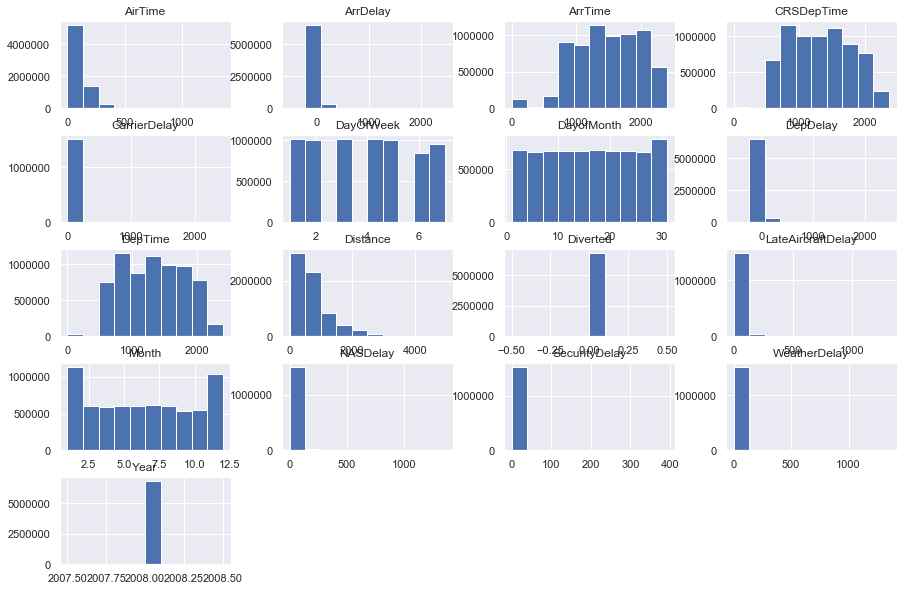

In [185]:
# check qucik histogram
df_clean.hist(figsize=[15, 10]);

### Analyse Cancelled Flights

In [52]:
can_order = df_cancelled['Cancellation_Desc'].value_counts()
can_order

Weather     54904
Carrier     54330
NAS         28188
Security       12
Name: Cancellation_Desc, dtype: int64

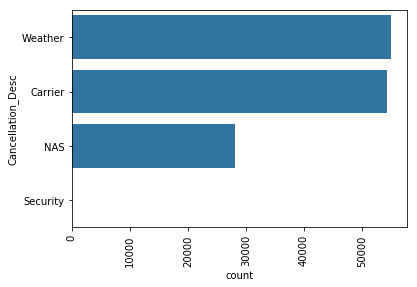

In [54]:
base_color = sns.color_palette()[0]
can_order = df_cancelled['Cancellation_Desc'].value_counts().index
sns.countplot(data = df_cancelled, y = 'Cancellation_Desc', color = base_color, order = can_order)
plt.xticks(rotation = 90);

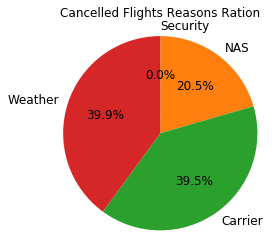

In [63]:
can_flights_Desc = df_cancelled.groupby("Cancellation_Desc").size()
sorted_Desc = can_flights_Desc.sort_values()
plt.pie(sorted_Desc, labels = sorted_Desc.index, startangle = 90, counterclock = False, autopct = '%1.1f%%',
       textprops=dict( color = "black", size = 12))
plt.axis("square")
plt.title("Cancelled Flights Reasons Ration");


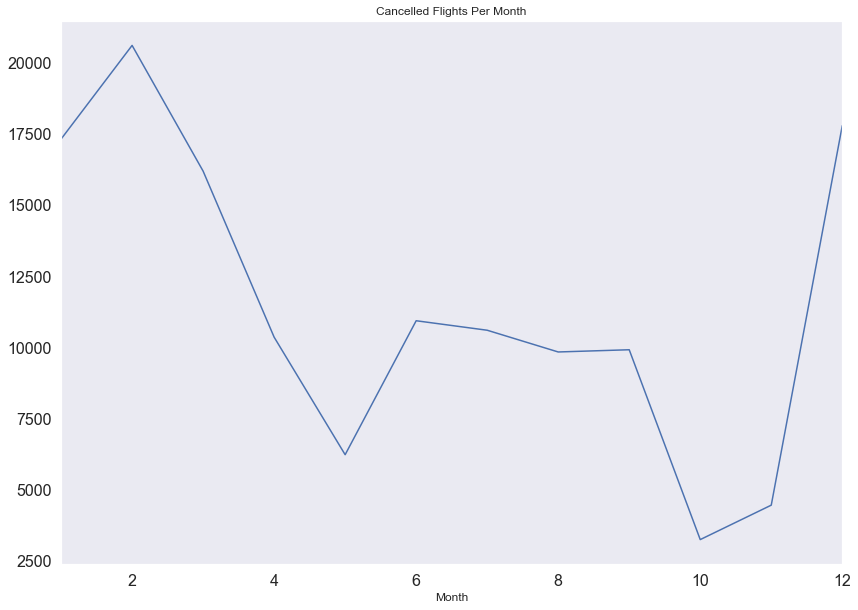

In [91]:
df_cancelled[['Month','Cancellation_Desc']].groupby(['Month']).count().plot(kind='line', figsize=(14, 10), grid=False, fontsize=16)
plt.title("Cancelled Flights Per Month")
plt.legend().remove()
plt.show();

Analysis: There were more cancellations from October to December and in the first month of the year . I think the bad weather in winter might actually be the reason behind all the cancellations.

#### Cancelled Flights VS all Flights

In [267]:
can_flights = df_cancelled['Cancelled'].value_counts()
can_flights

False    6872294
True      137434
Name: Cancelled, dtype: int64

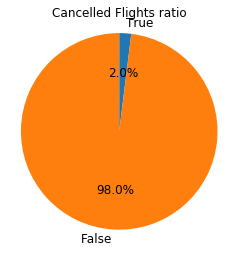

In [268]:
# plot Cancelled VS all flights
can_flights = df_cancelled.groupby("Cancelled").size()
sorted_counts = can_flights.sort_values()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct = '%1.1f%%',
       textprops=dict(color = "black", size = 12))
plt.axis("square")
plt.title("Cancelled Flights ratio");

### Analyse Diverted Flights

In [285]:
div_flights = df_diverted['Diverted'].value_counts()
div_flights

False    6992463
True       17265
Name: Diverted, dtype: int64

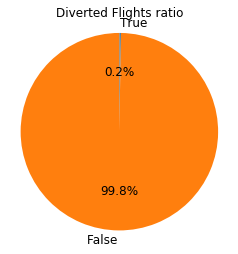

In [286]:
# plot Cancelled VS all flights
div_flights = df_diverted.groupby("Diverted").size()
sorted_counts_div = div_flights.sort_values()


plt.axis("square")
plt.title("Diverted Flights ratio");

### Analyse Delayed Flights

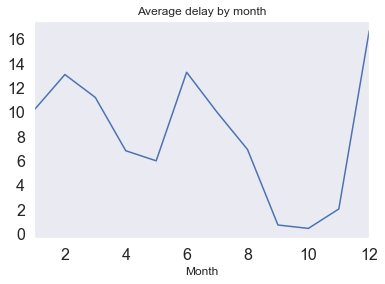

In [196]:
df_clean[['Month','ArrDelay']].groupby(['Month']).mean().plot(kind='line',  grid=False, fontsize=16)
plt.legend().remove()
plt.title('Average delay by month');


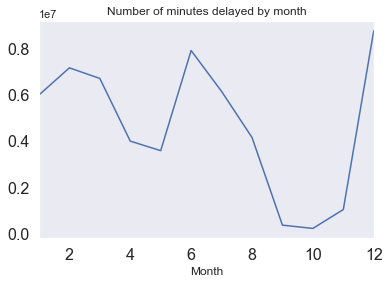

In [197]:
df_clean[['Month','ArrDelay']].groupby(['Month']).sum().plot(kind='line', grid=False, fontsize=16)
plt.legend().remove()
plt.title('Number of minutes delayed by month')
plt.show()

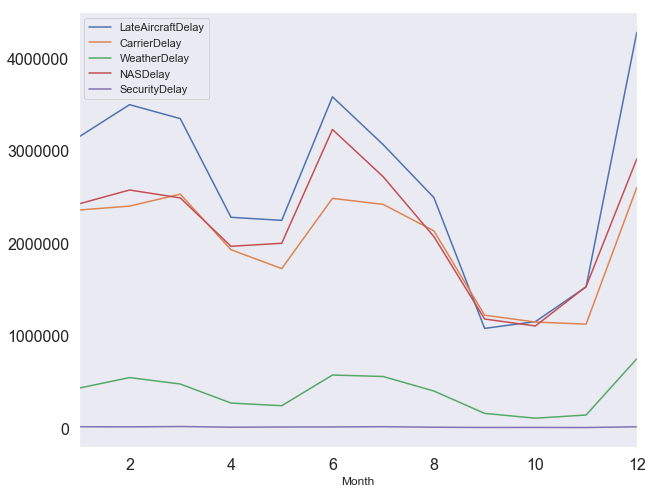

In [199]:
df1 = df_clean.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df1 = df1.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot(kind='line', figsize=(10, 8), grid= False, fontsize=16)
plt.show();

The correlation matrix identifies three main variables for delays: Late Aircraft Delay, Carrier Delay and NAS Delay. The graph corroborates this assumption, showing how those three variables create most of delays during the year. 


#### Delayed Flights VS all Flights per week

In [213]:
df_clean['Delayed'] = df_clean['DepDelay']>=15
df_clean.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,...,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delayed
0,2008,1,3,4,2003.0,1955,2211.0,WN,116.0,-14.0,...,TPA,810,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,False
1,2008,1,3,4,754.0,735,1002.0,WN,113.0,2.0,...,TPA,810,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,True


Note: A flight delay is when an airline flight takes off and/or lands later than its scheduled time. The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. A cancellation occurs when the airline does not operate the flight at all for a certain reason. https://en.wikipedia.org/wiki/Flight_cancellation_and_delay

In [214]:
df_flights_by_date = pd.DataFrame(df_clean.groupby('Date')['Year'].count())
df_flights_by_date.head(2)

,Year
Date,
2008-01-01,18597
2008-01-02,20428


In [215]:
df_delayed_flights_by_date = pd.DataFrame(df_clean[df_clean['Delayed']==True].groupby('Date')['Year'].count())
df_delayed_flights_by_date.head()

,Year
Date,
2008-01-01,6099
2008-01-02,8128
2008-01-03,6396
2008-01-04,4834
2008-01-05,5046


In [216]:
df_flights_by_date['Date1']=df_flights_by_date.index
df_delayed_flights_by_date['Date1']=df_delayed_flights_by_date.index

In [217]:
df_flights_by_date_both=df_flights_by_date.merge(df_delayed_flights_by_date, how='inner', on='Date1')
df_flights_by_date_both.head(2)

,Year_x,Date1,Year_y
0,18597,2008-01-01,6099
1,20428,2008-01-02,8128


In [218]:
df_flights_by_date_both=df_flights_by_date_both.rename(columns={'Year_x':'All_Flights', 'Year_y':'Delayed_Flights'})

In [219]:
df_flights_by_date_both.head(2)

,All_Flights,Date1,Delayed_Flights
0,18597,2008-01-01,6099
1,20428,2008-01-02,8128


In [220]:
df_flights_by_date_both['Week_Num']=df_flights_by_date_both['Date1'].apply(lambda x: x.isocalendar()[1])

In [221]:
df_flights_by_week = df_flights_by_date_both[['Week_Num', 'All_Flights', 'Delayed_Flights']]
df_flights_by_week.head()

,Week_Num,All_Flights,Delayed_Flights
0,1,18597,6099
1,1,20428,8128
2,1,20449,6396
3,1,20094,4834
4,1,17535,5046


In [222]:
df_flights_by_week2=df_flights_by_week.groupby(['Week_Num']).sum()
df_flights_by_week2.head()

,All_Flights,Delayed_Flights
Week_Num,,
1,167890,46521
2,132793,21474
3,130790,23022
4,131164,30710
5,129036,29711


In [223]:
df_flights_by_week2['Week_Num']= df_flights_by_week2.index

Text(0, 0.5, 'Number of Flights')

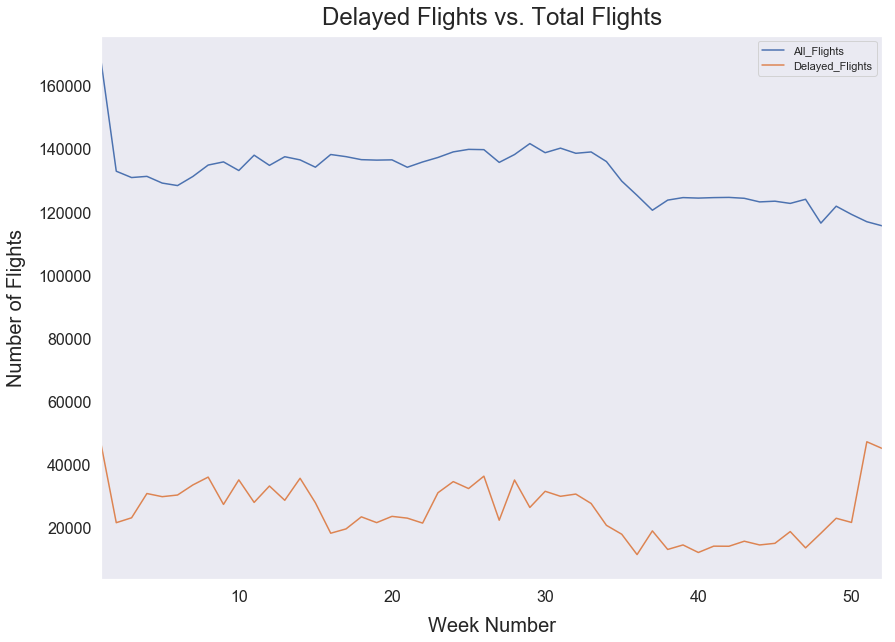

In [224]:
#plt.style.use('fivethirtyeight')
df_flights_by_week2.set_index(['Week_Num']).plot(kind='line', figsize=(14, 10), grid= False, fontsize=16)
plt.title("Delayed Flights vs. Total Flights", fontsize=24, y=1.01)
plt.xlabel("Week Number", fontsize=20, labelpad=12)
plt.ylabel("Number of Flights", fontsize=20, labelpad=12)

Analysis: It is apparent from the graph of all flights and delayed flights that there is a correlation between the two as expected. Surprisingly, the volatility in the delayed curve not present in the all-flights curve indicates that delayed flights is not a perfect function of the total number of flights. For example, the variance (or increases and decreases) in the delayed curve between weeks 10 and 20, 50 and 52 and to a lesser extent 36 and 40, is not reciprocated in the all-flights curve.

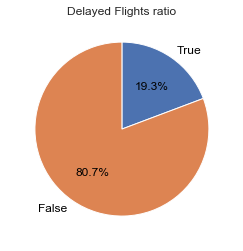

In [237]:
def2 = df_clean.groupby("Delayed").size()
sorted_counts_def2 = def2.sort_values()
plt.pie(sorted_counts_def2, labels = sorted_counts_def2.index, startangle = 90, counterclock = False, autopct = '%1.1f%%',
       textprops=dict(color = "black", size = 12))
plt.title("Delayed Flights ratio");

### Analyse the Distance

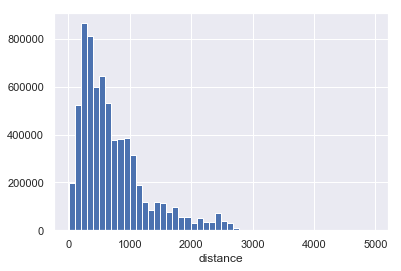

In [111]:
plt.hist(data = df_clean, x = "Distance", bins = 50)
plt.xlabel("distance");

In [112]:
# The extremely high values  should be paid more attention. These can be outliers.
df_clean[df_clean.Distance > 3500].sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,...,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Delayed
4815530,2008,8,13,3,935.0,1244.0,CO,467.0,-1.0,0.0,...,HNL,3904,0,NaN,NaN,NaN,NaN,NaN,2008-08-13,False
2004514,2008,4,23,3,1624.0,458.0,UA,437.0,-22.0,5.0,...,ORD,4243,0,NaN,NaN,NaN,NaN,NaN,2008-04-23,False
4453967,2008,8,8,5,1040.0,1420.0,UA,502.0,-10.0,1.0,...,HNL,4243,0,NaN,NaN,NaN,NaN,NaN,2008-08-08,False
1153851,2008,2,2,6,936.0,1402.0,CO,485.0,-3.0,1.0,...,HNL,3904,0,NaN,NaN,NaN,NaN,NaN,2008-02-02,False
2699352,2008,5,24,6,1543.0,618.0,DL,491.0,8.0,17.0,...,ATL,4502,0,NaN,NaN,NaN,NaN,NaN,2008-05-24,True


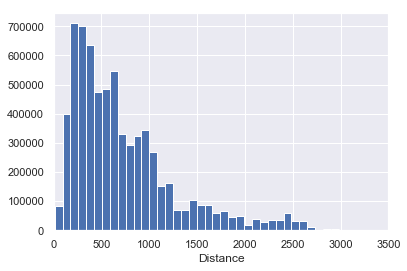

In [113]:
# take a closer look at the data in the x-range bwtween 0 and 3500.
# set x-limit betweeen 0 and 3500
plt.hist(data=df_clean, x="Distance", bins=60)
plt.xlabel("Distance")
plt.xlim([0,3500]);

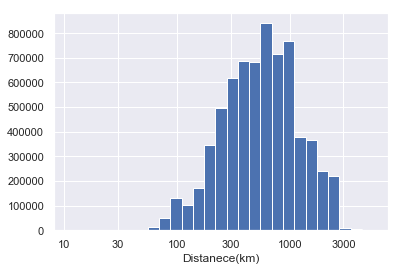

In [114]:
#There is a long tail in the distribution, so put it on a log scale instead.

bin = 10 ** np.arange(np.log10(df.Distance.min()), np.log10(df.Distance.max())+0.1, 0.1)
plt.hist(data=df_clean, x="Distance", bins=bin)
plt.xscale("log")
plt.xlabel("Distanece(km)")
plt.xticks([10,30,100,300,1000,3000],[10,30,100,300,1000,3000]);

Distance has a long-tailed distribution, with a lot of flights on the short distance end, and a few on the long distance end. When plotted on a log-scale, the distance distribution looks roughly normal distribution with a distance ceilings at the right foot. This is simply because the longer the distance between airports is, the more limited flights there are. And some highest values are, as I saw, the flight from or to Hawaii.

#### Distance vs. AirTime


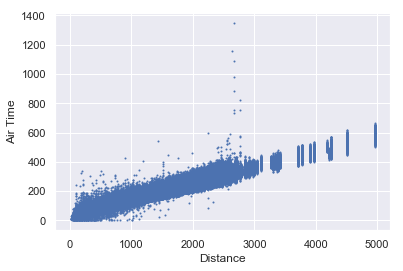

In [115]:
plt.scatter(data=df_clean, x="Distance", y="AirTime",s=1)
plt.xlabel("Distance")
plt.ylabel("Air Time");